In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [357]:
# fig2a_small_dom = {
#     "sigma2": 2.0,  # m²/s²
#     "L_2d": 15_000.0,  # m
#     "psi": np.deg2rad(45.0),  # radians
#     "z_i": 500.0,  # m
#     "L1_factor": 40,  # Domain length = L1_factor * L_2d
#     "L2_factor": 5,  # Domain length = L2_factor * L_2d
#     "N1": 2**8,  # Grid points in x direction
#     "N2": 2**5,  # Grid points in y direction
#     "equation": "eq15",  # Which equation to use
# }

fig2a_full_dom = {
    "sigma2": 2.0,  # m²/s²
    "L_2d": 15.0,  # m
    "psi": np.deg2rad(45.0),  # radians
    "z_i": 500.0,  # m
    "L1_factor": 1,  # Domain length = L1_factor * L_2d
    "L2_factor": 1,  # Domain length = L2_factor * L_2d
    "N1": 9,  # Grid points in x direction
    "N2": 9,  # Grid points in y direction
}

In [368]:
config = fig2a_full_dom

# Physical parameters
sigma2 = config.get("sigma2")
L_2d = config.get("L_2d")
psi = config.get("psi", np.pi / 4)  # 45 degrees by default
z_i = config.get("z_i")

# Grid parameters

L1 = config.get("L1_factor") * L_2d
L2 = config.get("L2_factor") * L_2d
N1 = 2 ** config.get("N1")
N2 = 2 ** config.get("N2")

grid_dimensions = np.array([L1, L2])
grid_levels = np.array([np.log2(N1), np.log2(N2)])

grid_node_counts = np.array([N1, N2])

equation = config.get("equation", "eq15")

dx = L1 / N1
dy = L2 / N2

c = (8.0 * sigma2) / (9.0 * L_2d ** (2.0 / 3.0))

In [ ]:
x = np.linspace(0, N1)
y = np.linspace(0, N2)
X, Y = np.meshgrid(x, y, indexing="ij")

In [381]:
def generate(config):
    """
    NOTE: assumes isotropic, so kappa = |k| and psi not used
    """
    # Physical parameters
    sigma2 = config.get("sigma2")
    L_2d = config.get("L_2d")
    psi = config.get("psi", np.pi / 4)  # 45 degrees by default
    z_i = config.get("z_i")

    # Grid parameters

    L1 = config.get("L1_factor") * L_2d
    L2 = config.get("L2_factor") * L_2d
    N1 = 2 ** config.get("N1")
    N2 = 2 ** config.get("N2")

    dx = L1 / N1
    dy = L2 / N2

    c = (8.0 * sigma2) / (9.0 * L_2d ** (2.0 / 3.0))
    
    # TODO: self.Frequencies = [(2 * np.pi / L[j]) * (Nd[j] * fft.fftfreq(Nd[j])) for j in range(d)]

    k1_fft = 2 * np.pi * np.fft.fftfreq(N1, dx)
    k2_fft = 2 * np.pi * np.fft.fftfreq(N2, dy)

    k1, k2 = np.meshgrid(k1_fft, k2_fft, indexing="ij")

    # Compute sqrt Phi
    k_mag = k1**2 + k2**2
    phi_ = np.sqrt(c / (np.pi * (L_2d**-2 + k_mag)**(7/3) * (1 + k_mag * z_i**2)))

    C1 = 1j * phi_ * k2
    C2 = 1j * phi_ * (-1 * k1)

    eta = np.random.normal(0, 1, size=(N1, N2))

    #NOTE:
    # eta = np.ones((N1, N2))

    u1_freq = C1 * eta
    u2_freq = C2 * eta

    transform_norm = np.sqrt(dx * dy)

    u1 = np.real(np.fft.ifft2(u1_freq) / transform_norm ) / (dx * dy)
    u2 = np.real(np.fft.ifft2(u2_freq) / transform_norm ) / (dx * dy)
    return u1, u2

In [384]:
u1, u2 = generate(fig2a_full_dom)

In [385]:
config = fig2a_full_dom.copy()

for _ in range(5):
    config["N1"] *= 2
    config["N2"] *= 2
    u1, u2 = generate(config)
    print("norm u1: ", np.linalg.norm(u1) * dx * dy)
    print("norm u2: ", np.linalg.norm(u2) * dx * dy)
    print()

KeyboardInterrupt: 

In [377]:
print("norm u1: ", np.linalg.norm(u1) * dx * dy)
print("norm u2: ", np.linalg.norm(u2) * dx * dy)

# 4x grid points --> 1/2 norm...

# 2^8 grid x and y; norm ~~ 0.0007926
# 2^9 grid x and y; norm ~~ 0.0003956

###
# u1 ~ 0.176
# u2 ~ 0.136

# 2^9 grid
# u1 ~ 0.122
# u2 ~ 0.142



norm u1:  0.07605268977905337
norm u2:  0.05984270411208749


<Axes: >

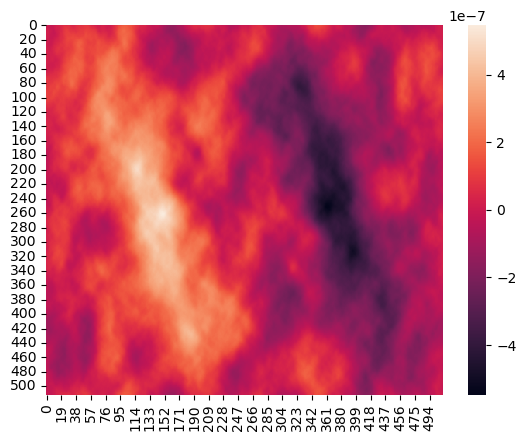

In [378]:
sns.heatmap(u1)

In [379]:
var_u1 = np.var(u1)
var_u2 = np.var(u2)

print(f"Variance u1: {var_u1:.6f} m²/s² (target: {sigma2:.6f} m²/s²)")
print(f"Variance u2: {var_u2:.6f} m²/s² (target: {sigma2:.6f} m²/s²)")

print()
print(f"Mean u1: {np.mean(u1):.6f} m/s")
print(f"Mean u2: {np.mean(u2):.6f} m/s")

print()
print(f"Median u1: {np.median(u1):.6f} m/s")
print(f"Median u2: {np.median(u2):.6f} m/s")

Variance u1: 0.000000 m²/s² (target: 2.000000 m²/s²)
Variance u2: 0.000000 m²/s² (target: 2.000000 m²/s²)

Mean u1: 0.000000 m/s
Mean u2: -0.000000 m/s

Median u1: 0.000000 m/s
Median u2: 0.000000 m/s


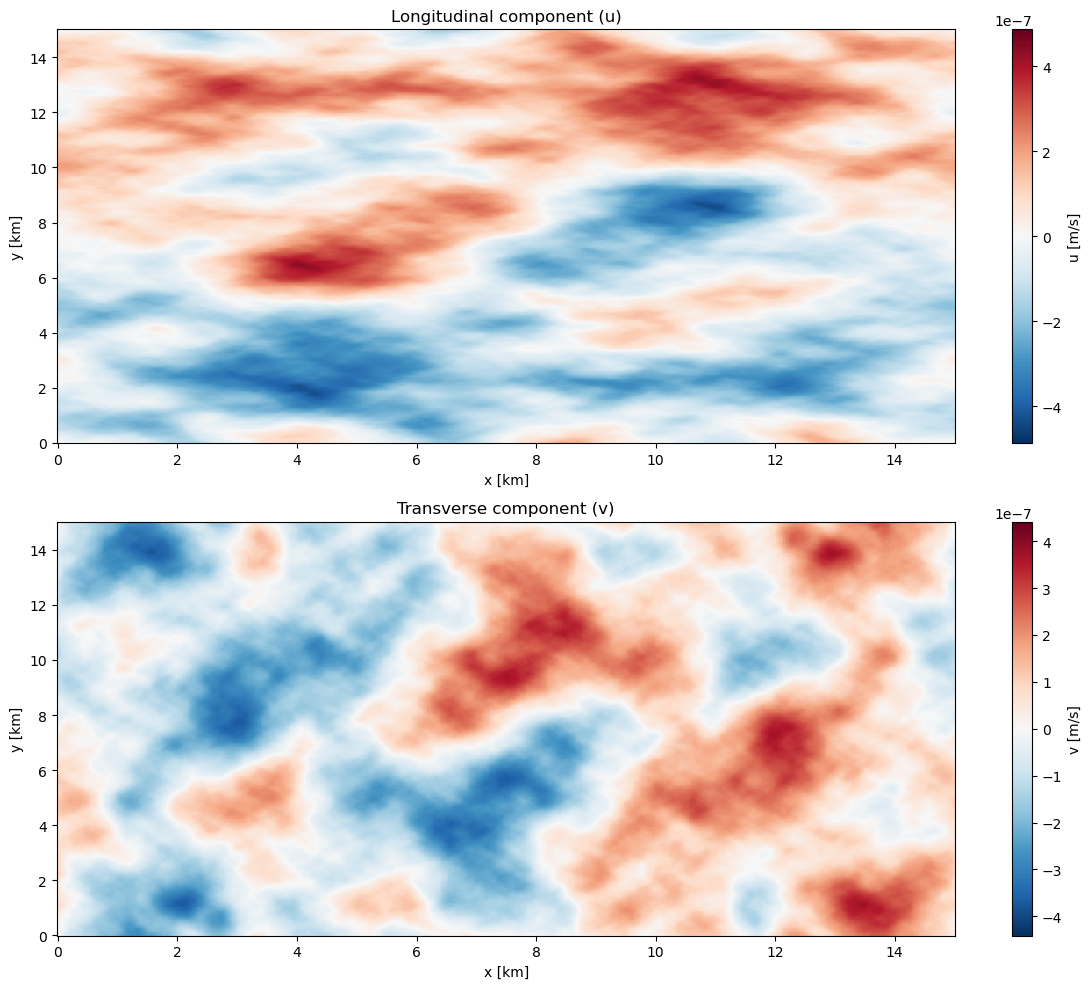

In [293]:
plt.figure(figsize=(12, 10))

x_km = np.linspace(0, L1/1000, N1)
y_km = np.linspace(0, L2/1000, N2)
X_km, Y_km = np.meshgrid(x_km, y_km, indexing="ij")


plt.subplot(2, 1, 1)
im1 = plt.pcolormesh(
    X_km, Y_km, u1, cmap="RdBu_r", shading="auto", vmin=-3 * np.std(u1), vmax=3 * np.std(u1)
)
plt.colorbar(im1, label="u [m/s]")
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.title("Longitudinal component (u)")

# Plot u2 component
plt.subplot(2, 1, 2)
im2 = plt.pcolormesh(
    X_km, Y_km, u2, cmap="RdBu_r", shading="auto", vmin=-3 * np.std(u2), vmax=3 * np.std(u2)
)
plt.colorbar(im2, label="v [m/s]")
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.title("Transverse component (v)")

plt.tight_layout()
plt.show()